In [1]:
import pandas as pd
from IPython.display import display
import folium
from folium.features import CustomIcon

In [2]:
df = pd.read_csv('../data/Street_Tree_List.csv')

In [137]:
stonefruit_trees = ["Prunus spp ::"]
# fig, pear, apple, persimmon, apricot, avocado, mango, guava, kumquat

In [138]:
stonefruit = df[df['qSpecies'].str.contains('|'.join(stonefruit_trees), case=False)]
stonefruit = stonefruit.dropna(subset=['Latitude', 'Longitude'])


In [139]:
stonefruit['qSpecies'].value_counts()

qSpecies
Prunus spp :: Cherry            152
Prunus spp :: Flowering Plum     38
Name: count, dtype: int64

In [29]:
# tree specifics
popup_title = "Peach tree"
image_path = '../resources/peach.png'


In [30]:
# Create a map centered on San Francisco
latitude_center = 37.7749
longitude_center = -122.4194
map_center = [latitude_center, longitude_center]
map_zoom = 12.5  # Adjust the zoom level as needed
map_obj = folium.Map(location=map_center, zoom_start=map_zoom)

# Add markers with custom icons for each point
for index, row in stonefruit.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    address = row["qAddress"]
    
    # Define the path to the image file
    icon = CustomIcon(
            icon_image=image_path,
            icon_size=(15, 15),  # Adjust the size as needed
#             icon_anchor=(25, 25),  # Adjust the anchor position as needed
        )

    marker = folium.Marker(
        location=[latitude, longitude], 
        icon=icon,
    )
    
    popup_content = f"<strong>{popup_title}</strong><br><strong>Address:</strong> {address}"
    popup = folium.Popup(popup_content, max_width=250)  # Adjust max_width as needed
    marker.add_child(popup)
    
    marker.add_to(map_obj)

# Display the map



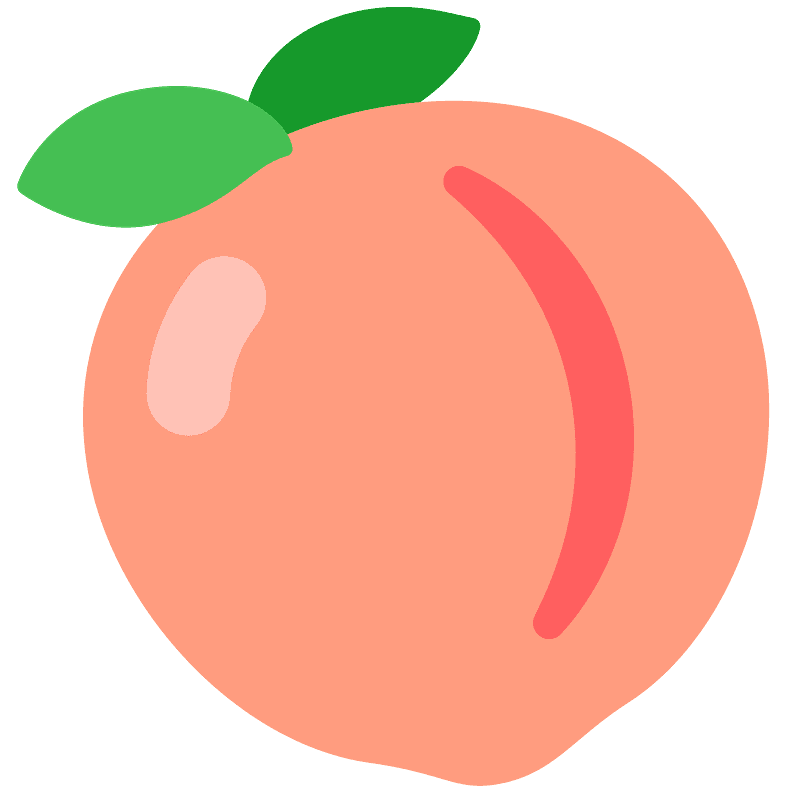

In [31]:
map_obj